<a href="https://colab.research.google.com/github/garvitbhardwajj/customersegmentation/blob/main/Customer_Segmentation_and_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define the problem statement


1.1. Understand the Industry - Type of Problem (Supervised, Unsupervised, Semi , etc)

Customer segementation

1.2. Understand the Business Objective - Why this problem & Desired Outcome

to better understand my customers and segregate them on the basis of different characterstics.

segmentation helps a company:
* Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).
* Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment.
* Identify ways to improve products or new product or service opportunities.
* Establish better customer relationships.
* Test pricing options.
* Focus on the most profitable customers.
* Improve customer service.
* Upsell and cross-sell other products and services.

to segemnt customers based on their characterstics.

1.3. Constraints & Limitations - Computational Power, Budget, Data Availability, Obstacle



1.4. Evaluation Metrics - Optimization Required, KPIs Tracking, Required Testing,

1.5. Relevancy to the target Audience - Model Prediction Usage i.e., Speed of Predict

1.6. Data Availability - Ease of Data Collection, Necessary Features Required

taken online from kaggle dataset

1.7.Scope of the Solution- Define the solution's capabilities to effectively manage expectations   while addressing the problem.

the solution must tell us about different typw of customers we have and how we can improve our product and services by serving all types of segements.



# Data Collection


2.1. Source Identification: Determine reliable sources like databases, APIs, sensors, or surveys for obtaining data.

2.2. Data Volume Required: Specify the amount of data needed for effective analysis.

2.3. Data Types: Classify data as labeled or unlabeled, based on its availability.

2.4. Data Quality: Address errors, bias, and maintain consistency within the data.

2.5. Data Relevancy: Ensure collected data is directly relevant to the problem being addressed.

2.6. Temporal Considerations: Account for time-related effects, seasonality, and changes in the data.

2.7. Legal and Ethical Concerns: Address data ethics and privacy policies to ensure compliance.

2.8. Sampling Strategy: Opt for sampling instead of using the entire population.

2.9. Data Privacy: Apply techniques like Z-Score or normalization for handling private/sensitive information.

2.10. Data Collection Tools: Utilize web scrapers and other appropriate tools.

2.11. Data Versioning: Implement version control for managing changes in the dataset.

2.12. Continuous Data Collection: Regularly update the model with fresh data over time for improved accuracy.

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Almabetter/csv files/Online Retail.csv')

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


# Data Preprocessing - Prepare the recipe, before the food.

## **3.1. Handling Missing Values**


- Mean/Median/Mode Replacement
- Random Sample Imputation
- Capturing NaN value with a new feature
- End of Distribution Imputation
- Arbitrary Imputation - Similar to Hyperparameter Tuning
- Frequent Categories Imputation
- Creating a Sub-model to predict the missing value
- Deleting Column if missing value > 60%
- Using Algorithms Which Support Missing Values i.e. KNN
- Checking for duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
missing_percent=(df['CustomerID'].isna().sum()/df['CustomerID'].shape[0])*100
print(f'percentage of missing CustomeID in our datset {round(missing_percent,3)}%')

percentage of missing CustomeID in our datset 24.927%


In [ ]:
df=df[df['CustomerID'].notna()]

In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.duplicated().sum()

5225

In [ ]:
df.drop_duplicates(inplace=True)

<ipython-input-10-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


## **3.2. Handling Outliers**

- Using Standard Deviation in Symmetric Curve
- Using IQR in skew-symmetric Curve
- Using Outlier Insensitive Algorithms.i.e. SVM, KNN, Decision Tree

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


The Quantity and UnitPrice column shows the minimum values as negative and as per our knowledge these values might be due to the cancelled orders.


The distribution of Quantity and UnitPrice looks to be skewed as there's a huge difference between the 75th percentile and the maximum value.

Also,the minimum value of prices is 0 , which is not feasible for buisness vaibility.

In [ ]:
# filtering orders whose quantity is negative
df[df['Quantity']<0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


There are 8872 records where the orders are cancelled and the quantity contains a negative value.

all orders strts with C which means cancelled orders.


cancelled orders and orginal orders must be removed from the dataset because they doesnt contribute to our revenue.


**we only remove the rows whose invoice no starts with C**

In [ ]:
df=df[~df['InvoiceNo'].str.startswith('C')]

df.shape

(392732, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
# removing the zero priced rows
df=df[df['UnitPrice']>0]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


## **3.3. Categorical Encoding**

- One Hot Encoding
- One Hot Encoding with many categorical - KDD Cup Challenge & Reduce Curse of Dimensionality
- Mean Encoding
- Ordinal Encoding
- Label Encoding
- Target guided Ordinal Encoding = mean encoding +label encoding
- Count (or) Frequency Encoding
- Probability ratio Encoding - Titanic Dataset (Survival & Not Survival)

## **3.4. Data Transformation**

- Standardisation
- Normalisation
- Robust Scaler
- Sum of (median-observation)/IQR
- Box-Cox Transformation - transformation of a non-normal dependent variable into a normal shape - T(y)=(y exp(lambda)-1)/(lambda)
- Gaussian Transformation
- Logarithmic Transformation
- Inverse Transformation
- Square Root Transformation
- Exponential Transformation

to create our rfm model, we need different columns contianing the day,date and time of at which the order is placed and the total amount spend by in each unqiue trasaction

In [ ]:
df['total_amount']=df['Quantity']*df['UnitPrice']
df

<ipython-input-17-8cd884efd353>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amount']=df['Quantity']*df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France,16.60


In [ ]:
# convert invoicedate column into datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%m/%d/%y %H:%M")


In [ ]:
# create some new features from invoice date
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day_num'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)
df['month'] = df['InvoiceDate'].dt.month_name()

## **3.5. Handling Imbalanced Dataset**

- Cross-Validation
- Under Sampling
- Over Sampling
- Synthetic Minority over Sampling Technique (SMOTE)
- Tree-Based Algorithm

## **3.6. Data Reduction**

- Dimensionality Reduction
- Numerosity Reduction - original data<>smaller form

# Exploratory Data Analysis (EDA)

 - Uncover Insights, Ignite Understanding.

4.1. Distribution Analysis: Utilize summary statistics, histograms, and box plots to understand data distribution.

4.2. Bivariate Analysis: Examine relationships between two variables using scatter plots and bar charts.

4.3. Multivariate Analysis & Feature Relationships: Explore complex interrelationships using tools like heatmaps and pair plots.

4.4. Temporal Analysis: Study data patterns and trends over time.

4.5. Categorical Data Analysis: Visualize categorical data through bar and pie charts.

4.6. Dimensionality Reduction Visualization (PCA): Reduce data dimensions and visualize using PCA.

4.7. Statistical & Hypothesis Tests: Apply tests like t-test and chi-square to validate assumptions.

4.8. Complex Data Type Visualization: Visualize text data using word clouds, images with distribution insights.

4.9. Geospatial Analysis: Analyze data in relation to geographical locations.

4.10. Segmentation Analysis: Identify data clusters or segments for further insights.


Which products are the most and least sold ones?

Which countries has the most and least number of customers?

Distribution of the numerical features.

Which day had the most and least number of purchases?

Which month had the most and least number of purchases?

Which hour in a day had the most and least number of purchases?

### Which products are the most and least sold ones?

In [ ]:
product_count_df=df['Description'].value_counts().reset_index()
product_count_df.rename(columns={'index':'Description','Description':'count'},inplace=True)
product_count_df

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389
...,...,...
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1


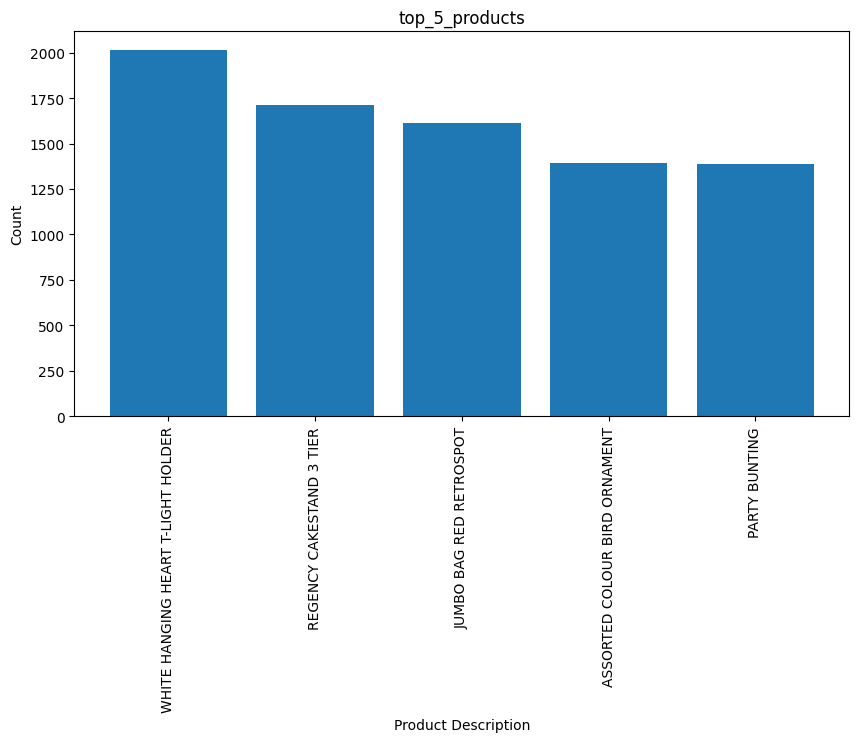

In [ ]:
import matplotlib.pyplot as plt

# Sort the dataframe by count in descending order
product_count_df = product_count_df.sort_values(by='count', ascending=False)

# Select the top 5 products
top_5_products = product_count_df.head()

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(top_5_products['Description'], top_5_products['count'])

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Set x and y labels
plt.xlabel('Product Description')
plt.ylabel('Count')
plt.title('top_5_products')
# Show the plot
plt.show()


In [ ]:
product_count_df[product_count_df['count']==1]

,Description,count
3799,BAKING MOULD TOFFEE CUP CHOCOLATE,1
3809,JAM JAR WITH BLUE LID,1
3801,PINK CHRISTMAS FLOCK DROPLET,1
3800,"ACRYLIC JEWEL SNOWFLAKE,PINK",1
3803,PURPLE FRANGIPANI HAIRCLIP,1
...,...,...
3737,WHITE STONE/CRYSTAL EARRINGS,1
3738,UNION JACK HOT WATER BOTTLE,1
3739,BLUE PADDED SOFT MOBILE,1
3740,POTTING SHED SOW 'N' GROW SET,1


**as there are 213 product which have count=1, it is not possible to plot all of them.so we only plot the last 10**

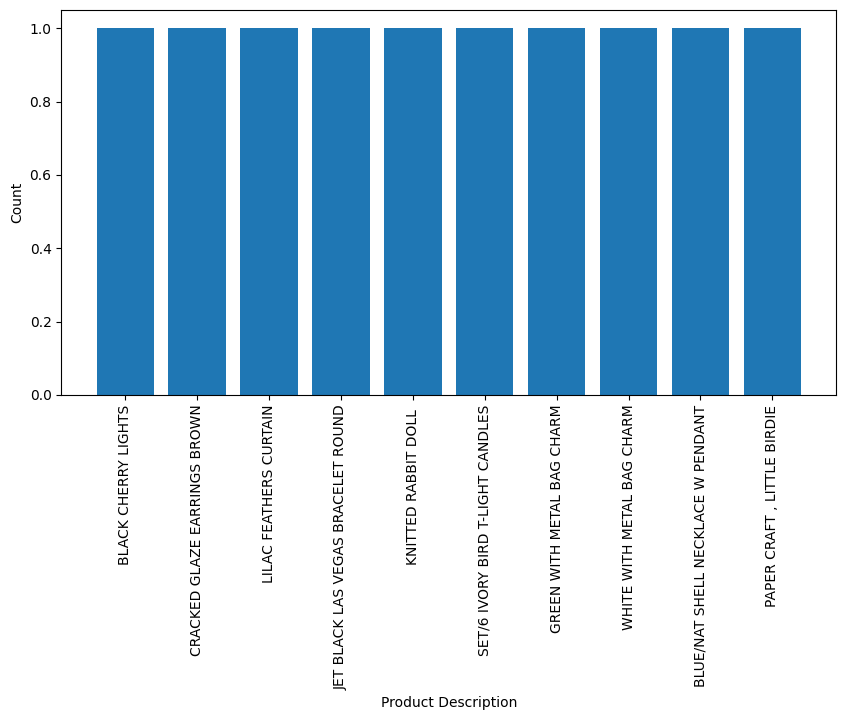

In [ ]:
import matplotlib.pyplot as plt

# Sort the dataframe by count in descending order
product_count_df = product_count_df.sort_values(by='count', ascending=False)

# Select the last 5 products
last_products = product_count_df.tail(10)

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(last_products['Description'], last_products['count'])

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Set x and y labels
plt.xlabel('Product Description')
plt.ylabel('Count')

# Show the plot
plt.show()


### **Which countries has the most number of customers?**

In [ ]:
country_df=df['Country'].value_counts().reset_index().rename(columns={'index':'country_name','Country':'count'})
country_df

,country_name,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1453
9,Australia,1181


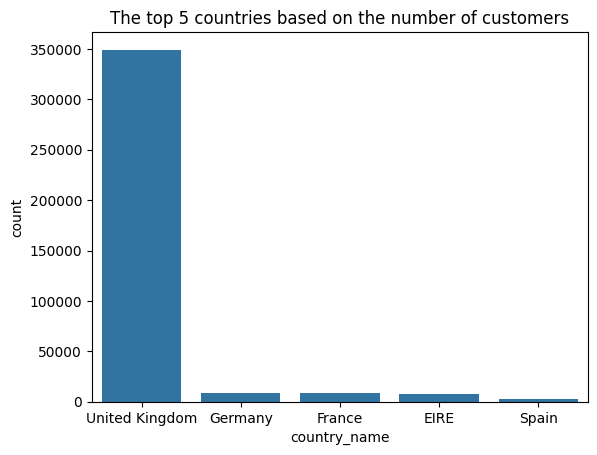

In [ ]:
# plot the bottom 5 countries based on the number of customers
import seaborn as sns
sns.barplot(x='country_name', y='count', data=country_df[:5])
plt.title('The top 5 countries based on the number of customers')
plt.show()

### **Which countries has the least number of customers?**

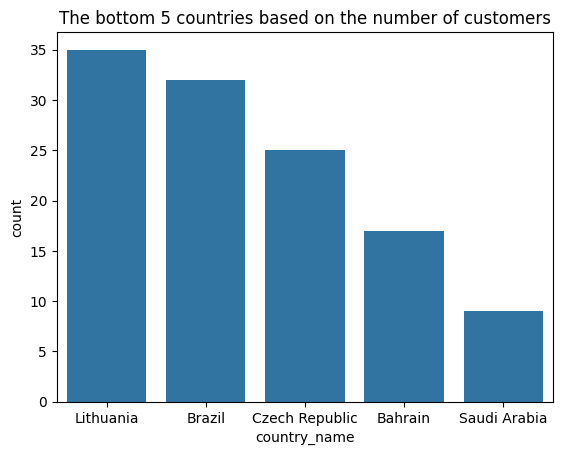

In [ ]:
# plot the bottom 5 countries based on the number of customers
import seaborn as sns
sns.barplot(x='country_name', y='count', data=country_df[-5:])
plt.title('The bottom 5 countries based on the number of customers')
plt.show()

* Saudi Arabia has the least number of customers followed by Bahrain.

### **What is the order share of the top 10 customers?**

In [ ]:
# order share of top 10 customers
share_df = (df['CustomerID'].value_counts()/sum(df['CustomerID'].value_counts()) * 100).reset_index()
share_df.columns = ['Customer ID', 'Order Share']
share_df.head(10).cumsum()

,Customer ID,Order Share
0,17841.0,1.954713
1,32752.0,3.398592
2,46848.0,4.700121
3,59596.0,5.823648
4,74202.0,6.505353
5,89513.0,7.107861
6,104159.0,7.636519
7,117248.0,8.098459
8,130511.0,8.522965
9,144809.0,8.939831


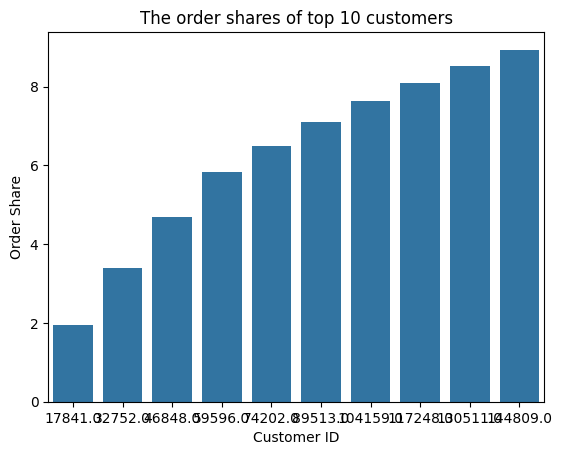

In [ ]:
# plot the top 10 customer's order share
sns.barplot(x='Customer ID', y='Order Share', data=share_df[:10].cumsum())
plt.title('The order shares of top 10 customers')
plt.show()

* We can observe that only 10 customers out of 4338 unique customers are responsible for approx 9% of the total orders.

* We can infer that these customers might be wholesalers.

### **Let us check the distribution of the numerical features:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392692 non-null  object        
 1   StockCode     392692 non-null  object        
 2   Description   392692 non-null  object        
 3   Quantity      392692 non-null  int64         
 4   InvoiceDate   392692 non-null  datetime64[ns]
 5   UnitPrice     392692 non-null  float64       
 6   CustomerID    392692 non-null  float64       
 7   Country       392692 non-null  object        
 8   total_amount  392692 non-null  float64       
 9   day           392692 non-null  object        
 10  year          392692 non-null  int64         
 11  month_num     392692 non-null  int64         
 12  day_num       392692 non-null  int64         
 13  hour          392692 non-null  int64         
 14  minute        392692 non-null  int64         
 15  month         392

<ipython-input-31-fcfa63134928>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-31-fcfa63134928>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
<ipython-input-31-fcfa63134928>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use 

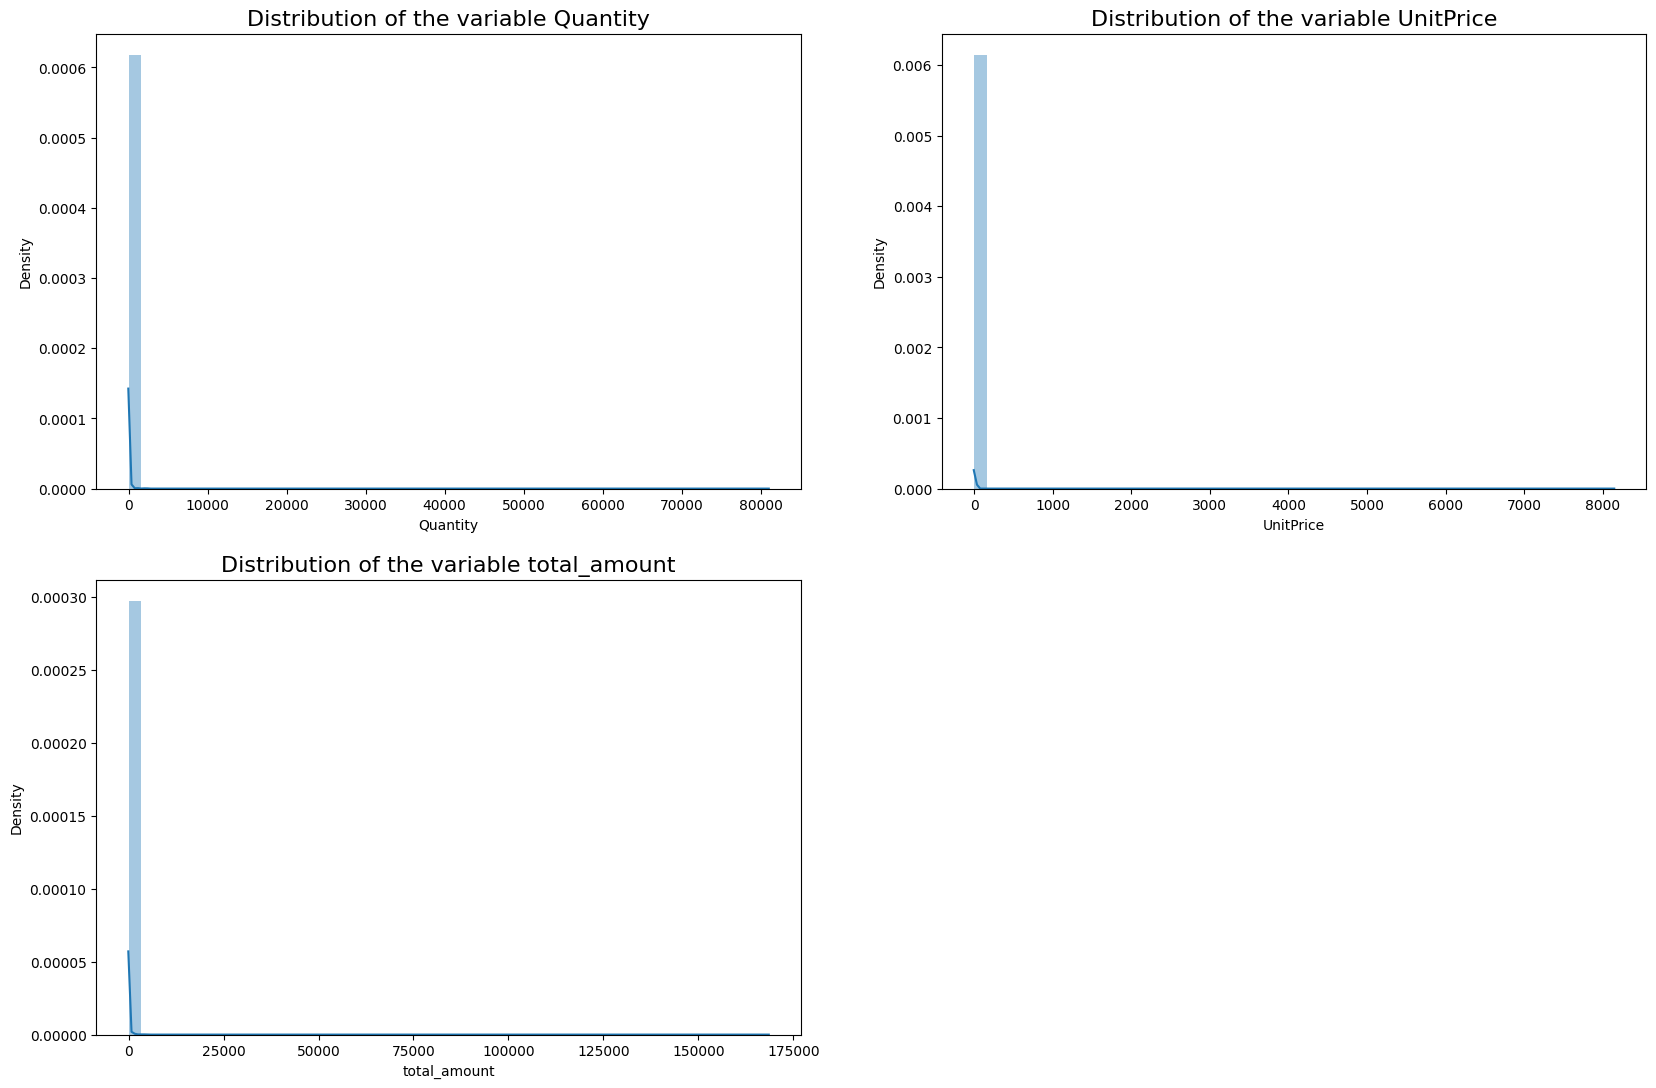

In [ ]:
# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'total_amount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The distribution of all the variables are heavily right skewed.

* We will apply log transformation on these variables to make it less skewed.

<ipython-input-32-f9d19e1b99ac>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-32-f9d19e1b99ac>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df[feature]))
<ipython-input-32-f9d19e1b99ac>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your co

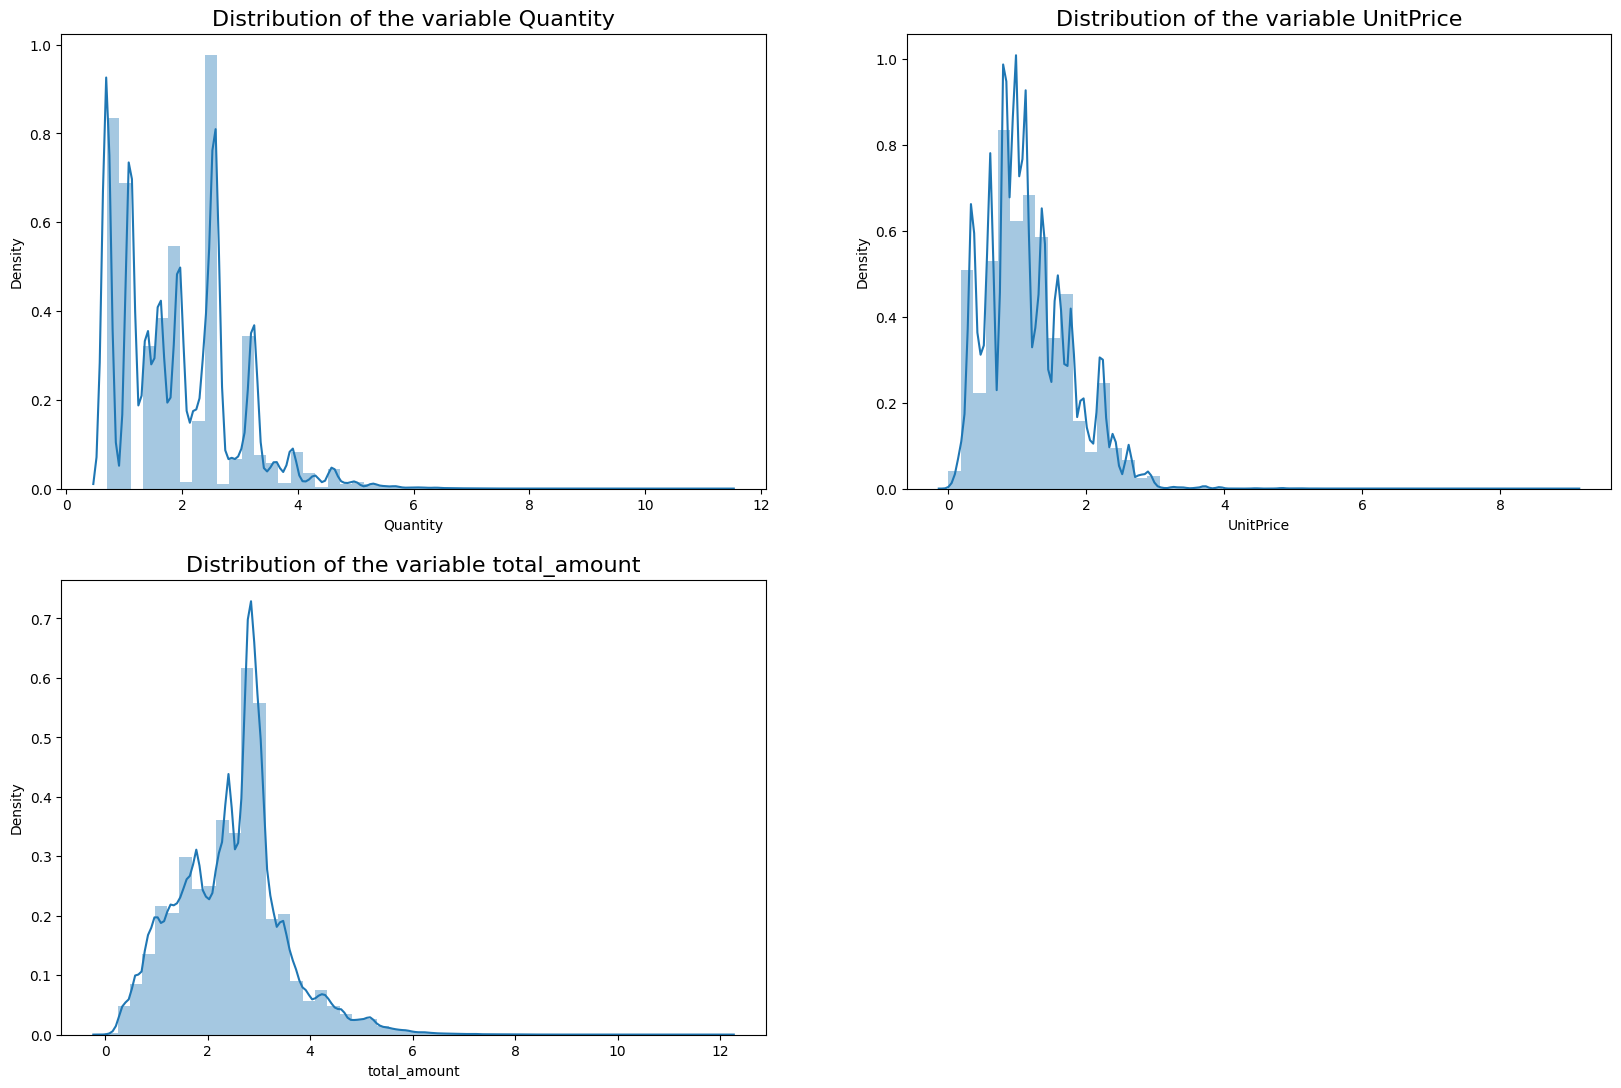

In [ ]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The variables after log transformation are less skewed than before.

* It isn't a normal distribution but somewhat close to that than before.

#### **Which day of the week had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t the day of the week
day_df = df['day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day Name'}, inplace=True)
day_df.rename(columns={'day': 'Count'}, inplace=True)
day_df

,Day Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


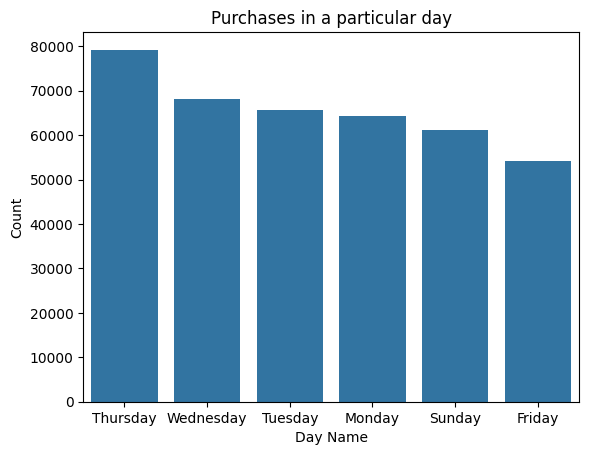

In [ ]:
# plot the number of purchases w.r.t day of the week
sns.barplot(x='Day Name', y='Count', data=day_df)
plt.title('Purchases in a particular day')
plt.show()

* Most of the customers have made a purchase in Thursday followed by Wednesday.

* Friday is the day with least number of purchases made.

#### **Which month had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t month
month_df = df['month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month_df

,Month Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


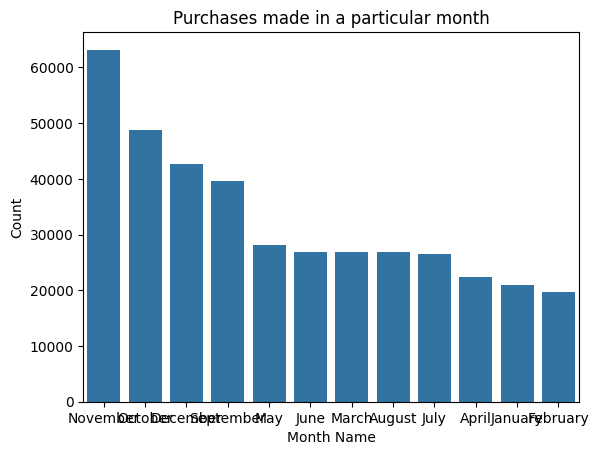

In [ ]:
# plot the number of purchases w.r.t month
sns.barplot(x='Month Name', y='Count', data=month_df)
plt.title('Purchases made in a particular month')
plt.show()

* The most number of purchases are made during October to December which is a festive season for many people.

* The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

#### **Which hour of the day had the most and the least number of purchases?**

In [ ]:
# number of purchases w.r.t hour of the day
hour_df = df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour Name,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


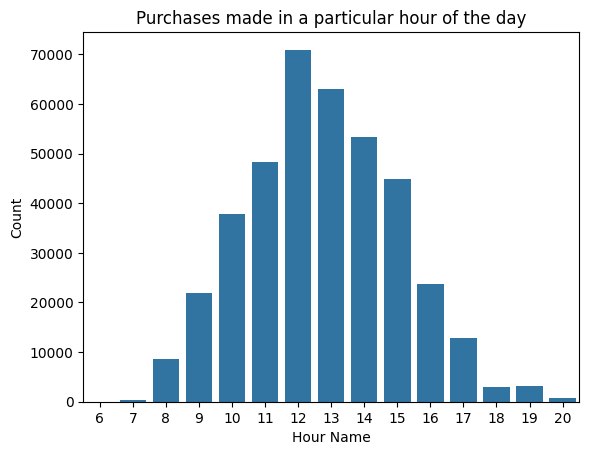

In [ ]:
# plot the number of purchases w.r.t hour of the day
sns.barplot(x='Hour Name', y='Count', data=hour_df)
plt.title('Purchases made in a particular hour of the day')
plt.show()

* Most of the purchases are around the afternoon period and a very few number of purchases during morning or evening.

* We can bucket this hour graph into morning, afternoon and evening buckets.

In [ ]:
# group the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
df['time_day'] = df['hour'].apply(time_day)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,day,year,month_num,day_num,hour,minute,month,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,2010,12,1,8,26,December,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,2010,12,1,8,26,December,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December,Morning


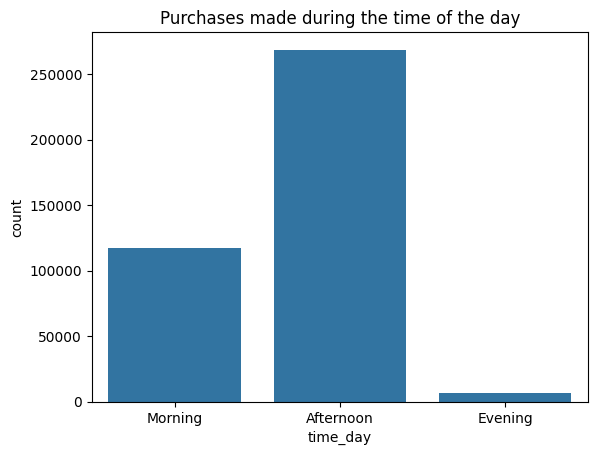

In [ ]:
# plot the number of purchases w.r.t hour again
sns.countplot(x='time_day', data=df)
plt.title('Purchases made during the time of the day')
plt.show()

* Now, it is more clear that most of the purchases has occurred during the Afternoon followed by Morning and the least number of purchases during Evening.

#  Model Selection, Training & Evaluation

 - Crafting, Polishing, and Assessing the Winning Model

5.1. Data Splitting: Divide data into various proportions for training and testing i.e 80:20, 70:30, 90:10, 80:10:10, 90:5:5


5.2. Algorithm Library: Select suitable algorithms from a comprehensive library.


5.3. Model Evaluation Metrics: Choose metrics aligned with the specific problem domain. (Healthcare - Recall, Stock Market - Precision) etc.

5.4. Scalability: Ensure the model's capacity to handle larger datasets if required.

5.5. Hyperparameter Tuning: Optimize hyperparameters using techniques like grid search or automated tools.

5.6. Parallelization and GPU Support: Utilize parallel processing and GPU resources for efficient training.

5.7. Model Interpretability & Explainability: Employ tools like SHAP, LIME, and ELI5 to understand model decisions.

5.8. Handling Imbalanced Data: Address imbalances to prevent bias in model performance.

5.9. Transfer Learning and Pre-trained Models: Leverage pre-trained models for faster and enhanced training.

5.10. Early Stopping: Monitor and halt training to prevent overfitting.

5.11. Save and Load Models: Store and retrieve trained models for future use.

5.12. Experiment Logging and Versioning: Use tools like MLflow or Weights & Biases to manage model versions.

5.13. Pipeline Integration: Integrate the model into data processing pipelines.

5.14. Feedback Loops: Implement retraining based on updated data.

5.15. Automated Machine Learning (AutoML): Automatically search for optimal models and hyperparameters.

## **Let us create the RFM Model (Recency, Frequency and Monetary):**


#### Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by measuring and analyzing spending habits.

#### The RFM model is based on three quantitative factors:

1. Recency: How recently a customer has made a purchase
2. Frequency: How often a customer makes a purchase
3. Monetary Value: How much money a customer spends on purchases

#### RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

#### These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.


### **Significance of Recency, Frequency and Monetary Value:**

#### RFM analysis allows a comparison between potential contributors or clients. It gives organizations a sense of how much revenue comes from repeat customers (versus new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers.

#### Despite the useful information that is acquired through RFM analysis, firms must take into consideration that even the best customers will not want to be over-solicited, and the lower-ranking customers may be cultivated with additional marketing efforts. It works as a snapshot of the clientele and as a tool to prioritize nurturing, but it should not be taken as a license to simply do more of the same-old, same-old sales techniques.

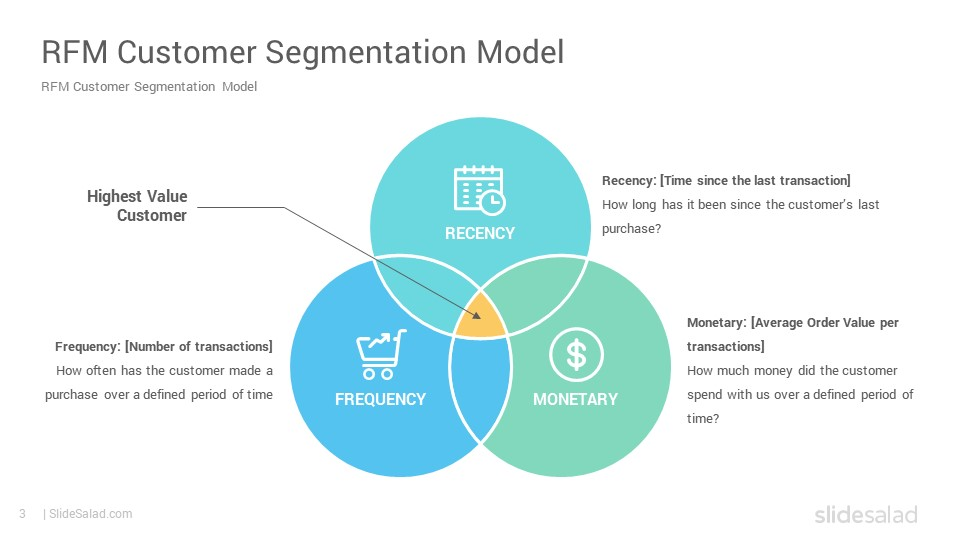

### **Performing RFM Segmentation and RFM Analysis, step by step:**

#### **Step 1:**
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. The raw data for doing this, which should be readily available in the company’s CRM or transactional databases, can be compiled in an Excel spreadsheet or database.

#### **Step 2:**
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool. Unless using specialized software, it’s recommended to divide the customers into four tiers for each dimension, such that each customer will be assigned to one tier in each dimension.

#### **Step 3:**
The third step is to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.

#### **Step 4:**
The fourth step actually goes beyond the RFM segmentation itself: crafting specific messaging that is tailored for each customer group. By focusing on the behavioral patterns of particular groups, RFM marketing allows marketers to communicate with customers in a much more effective manner.

#### **Filter UK data only:**

##### Being a UK based retail store and as most of the customers or a huge chunk of customers are from UK, we have decided to consider the UK based customers only for segmentation.

In [ ]:
# filter UK data only
df = df[df['Country'] == 'United Kingdom']

# print the shape of the data
df.shape

(349203, 17)

### **Calculating RFM Scores:**

In [ ]:

df['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,day,year,month_num,day_num,hour,minute,month,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,2010,12,1,8,26,December,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,2010,12,1,8,26,December,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,Friday,2011,12,9,12,31,December,Afternoon
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,Friday,2011,12,9,12,49,December,Afternoon
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,Friday,2011,12,9,12,49,December,Afternoon
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,Friday,2011,12,9,12,49,December,Afternoon


In [ ]:
import datetime as dt
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'total_amount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'total_amount': 'Monetary'}, inplace=True)

rfm_df.reset_index()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
...,...,...,...,...
3915,18280.0,277,10,180.60
3916,18281.0,180,7,80.82
3917,18282.0,7,12,178.05
3918,18283.0,3,721,2045.53


In [ ]:
# descriptive stats of the rfm dataframe
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,89.082398,1858.424654
std,99.533485,214.034542,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,298.185000
50%,50.000000,40.000000,644.975000
75%,142.000000,98.000000,1571.285000
max,373.000000,7676.000000,259657.300000


#### **Let us plot the distribution of Recency, Frequency and Monetary Value:**

<ipython-input-66-99f7f11fb310>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)


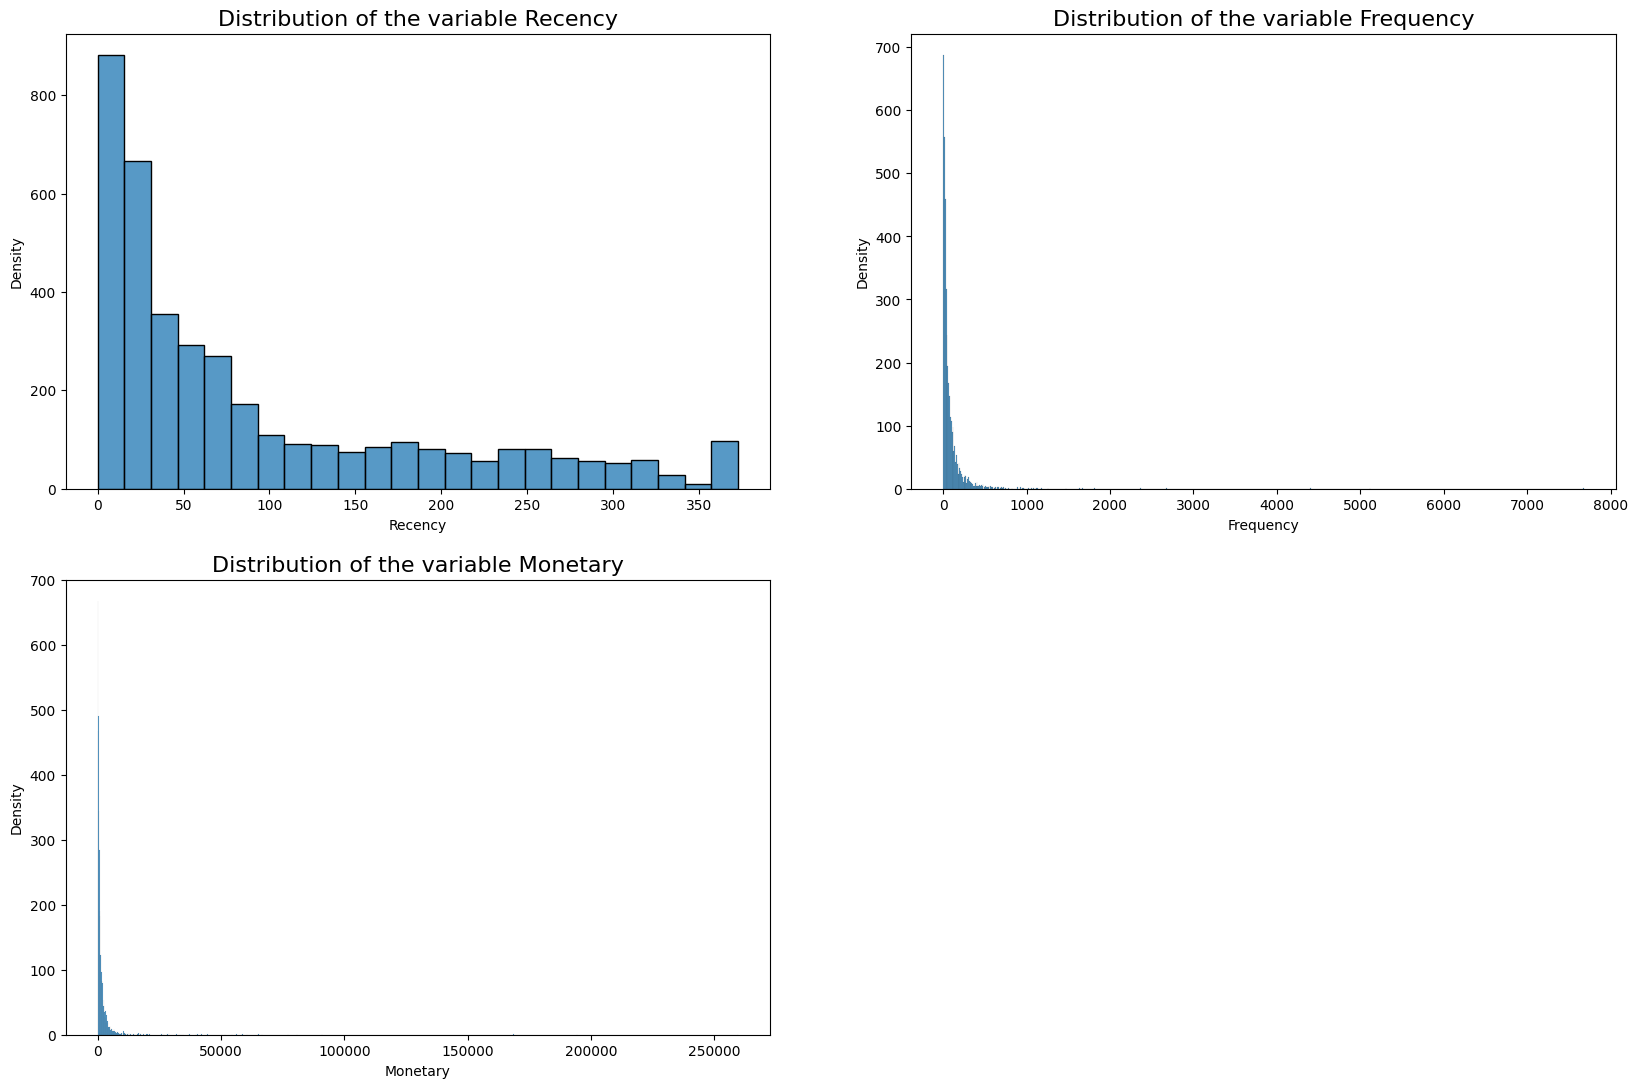

In [ ]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.histplot(rfm_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

### **Apply log transformation to the RFM values and plot each distribution:**

Applying a log transformation in the context of RFM (Recency, Frequency, Monetary) analysis, or any data analysis task, serves several important purposes:

1. **Normalization**: RFM metrics can vary significantly in scale. For example, monetary values can range from a few dollars to thousands, while frequency might vary from 1 to hundreds of times. A log transformation helps to normalize these scales, making it easier to compare and analyze data across different scales.

2. **Handling Skewed Data**: Many datasets, especially those involving monetary values or counts (like frequency), are often right-skewed, meaning most of the data points are clustered around the lower end of the scale with a long tail extending towards higher values. Log transformation helps in reducing the skewness, making the distribution more symmetrical and closer to a normal distribution. This is beneficial because many statistical methods and machine learning algorithms assume or perform better with data that is approximately normally distributed.

3. **Reducing the Impact of Outliers**: In RFM data, you might encounter extreme values or outliers, such as very high monetary values or unusually frequent purchases. These outliers can disproportionately influence the analysis. Log transformation reduces the impact of outliers by bringing them closer to the rest of the data points, thus providing a more balanced view.


In [ ]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
  if num <= 0:
    return 1
  else:
    return num

# apply the function to recency and monetary columns
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(x) for x in rfm_df['Monetary']]

# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)
log_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12747.0,0.693,4.635,8.342
12748.0,0.000,8.392,10.406
12749.0,1.099,5.293,8.317
12820.0,1.099,4.078,6.848
...,...,...,...
18280.0,5.624,2.303,5.196
18281.0,5.193,1.946,4.392
18282.0,1.946,2.485,5.182


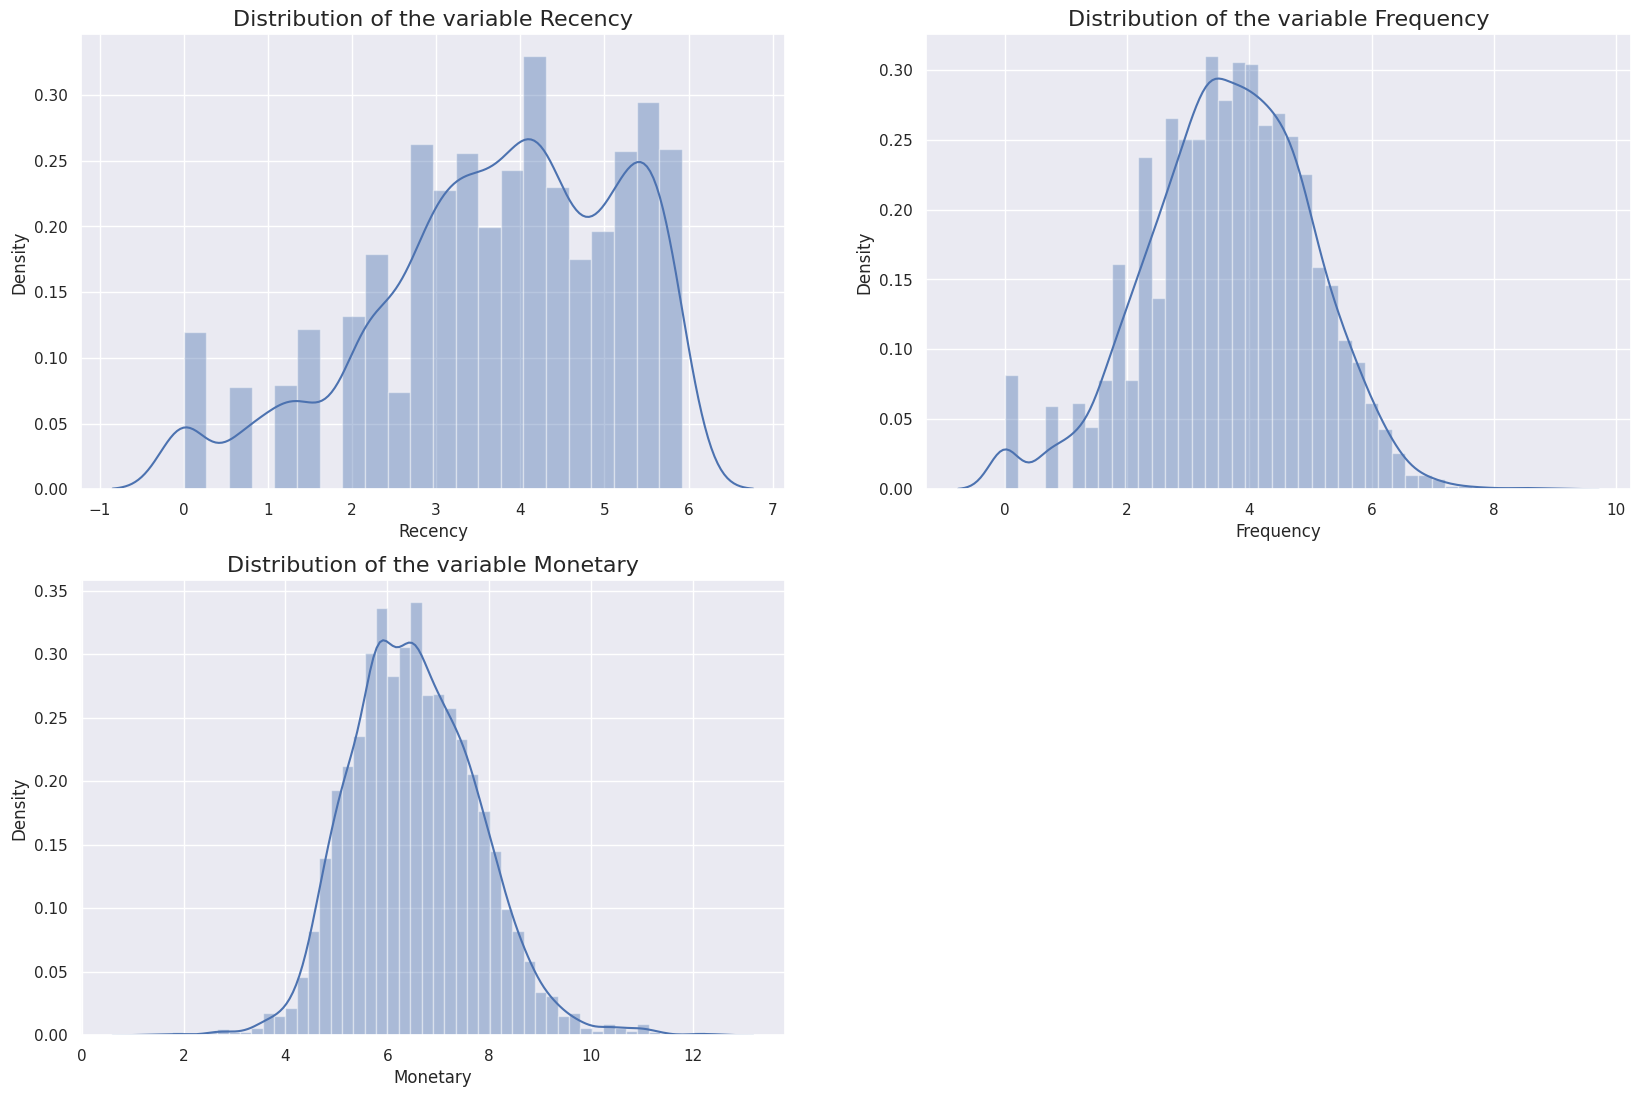

In [ ]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in log_df:
  plt.subplot(2,2,count)
  sns.distplot(log_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The distribution of Recency, Frequency and Monetary values almost looks
normal now.

In [ ]:
# apply log transformation on the original rfm dataframe
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
# display the rfm_df
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942
12747.0,2,103,4196.01,0.693147,4.634729,8.341889
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873
12749.0,3,199,4090.88,1.098612,5.293305,8.316515
12820.0,3,59,942.34,1.098612,4.077537,6.848366


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

## **Implementing K-Means Clustering:**



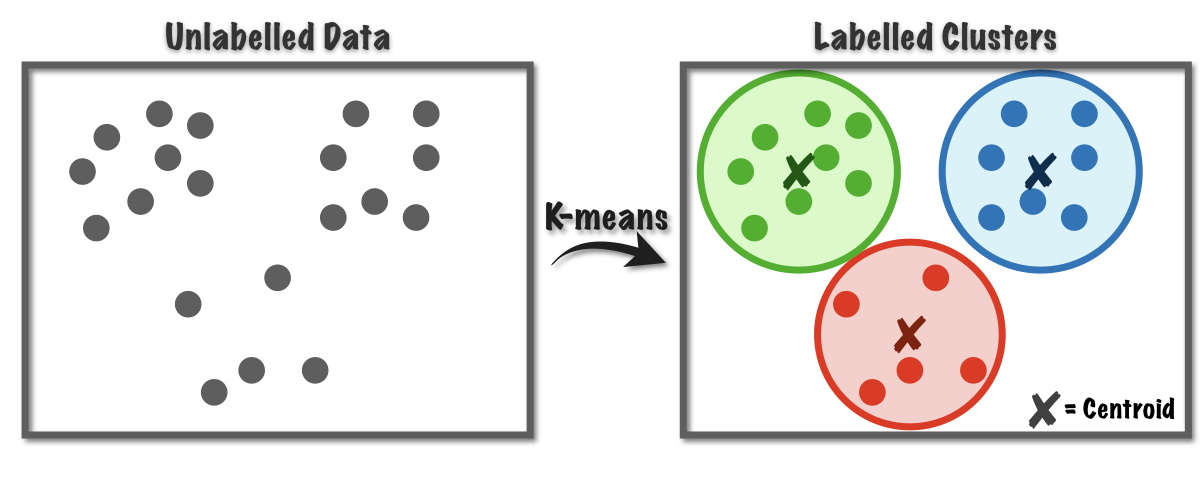

### **Applying Elbow method on Recency, Frequency and Monetary:**

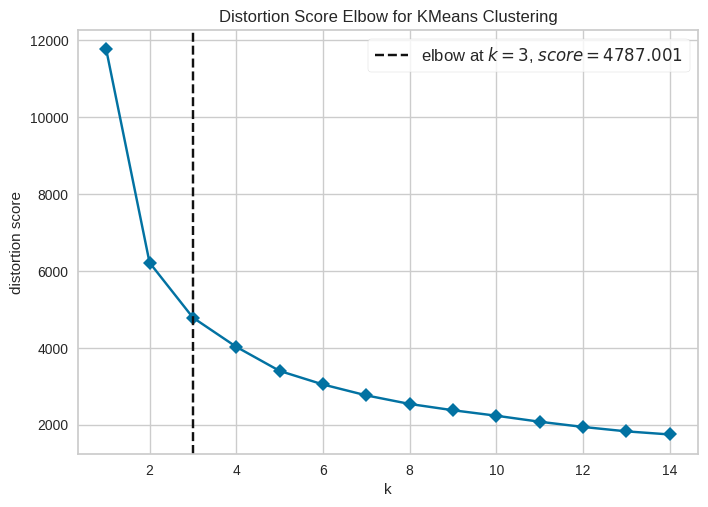

In [ ]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000,n_init=10)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

* From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

* We will again run the model with number of clusters as 3.

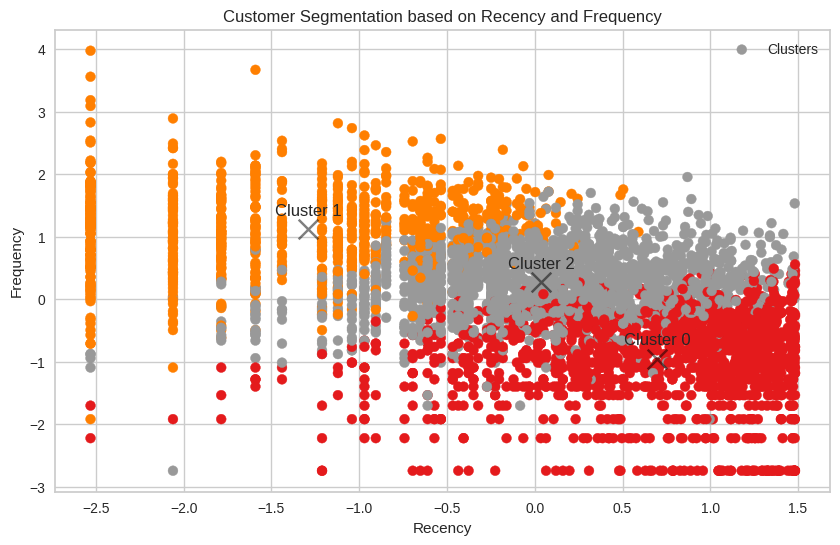

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data.

### **Interpreting the Clusters with the help of RFM Group:**

#### **Now, split the RFM values into four quantiles:**

In [ ]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
# calculate RFM segment values for each record

rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

NameError: name 'quantiles' is not defined

#### **Calculate RFM Group and RFM Score from the RFM segmentation:**

In [ ]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5


In [ ]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9,2
12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3,1
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3,1
12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3,1
12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5,1


In [ ]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore
Cluster,,,,,,,,,,
0,165.282744,15.119196,286.190805,4.759947,2.386550,5.410671,3.298683,3.629245,3.564103,10.492030
1,10.912621,258.559466,5933.187633,1.830261,5.151263,8.043445,1.207524,1.288835,1.241505,3.737864
2,67.853600,69.166969,1199.700365,3.787118,4.012225,6.770923,2.425287,2.156685,2.198427,6.780399


### **Interpretation:**

1. **Cluster 0**:
   - **Recency**: High (average around 165 days)
   - **Frequency**: Low (average around 15 transactions)
   - **Monetary**: Low (average around $286)
   - **Interpretation**: Customers in this cluster are likely to be 'At-Risk' or 'Lapsed' customers. They haven't made purchases recently, and when they did, they didn't do so very frequently and didn't spend much. These customers might have been one-time buyers or occasional shoppers. Engaging them with reactivation campaigns or exploring why they haven’t returned can be a strategic move.

2. **Cluster 1**:
   - **Recency**: Very Low (average around 11 days)
   - **Frequency**: Very High (average around 259 transactions)
   - **Monetary**: Very High (average around $5933)
   - **Interpretation**: This cluster represents your 'Champions' or 'Loyal' customers. They shop frequently, recently, and spend the most. They are the most valuable segment, likely to respond positively to new offers, up-sell and cross-sell opportunities. Maintaining their high engagement level is crucial, and they can also be targeted for feedback or as brand ambassadors.

3. **Cluster 2**:
   - **Recency**: Moderate (average around 68 days)
   - **Frequency**: Moderate (average around 69 transactions)
   - **Monetary**: Moderate (average around $1200)
   - **Interpretation**: Customers in this cluster can be seen as 'Potential Loyalists' or 'Promising' customers. They have a balanced score in all three RFM metrics. These customers have the potential to become more valuable if properly engaged. Tailored marketing strategies, loyalty programs, and incentives to increase their purchase frequency and value can be effective.

**Overall Strategy**:
- **Cluster 0 ('At-Risk/Lapsed')**: Focus on re-engagement strategies. Understand their needs and reasons for not returning. Offer incentives or feedback surveys to encourage them to revisit and make purchases.
- **Cluster 1 ('Champions/Loyal')**: Prioritize maintaining their high level of engagement. Offer exclusive deals, loyalty programs, and early access to new products. They can also be engaged in referral programs.
- **Cluster 2 ('Potential Loyalists/Promising')**: Encourage them to visit and buy more often. Personalized communication, recommending products based on past purchases, and loyalty rewards can be effective.


Thus, from our comparison table we can conclude that KMeans clustering on Recency, Frequency and Monetary data gives us the best result with the optimal number of clusters as 3. We can use this model to cluster our data in 3 segments and develop better marketing strategies.

### **Activity 2: True/False**

**Question 1**

"Customers in the 'At-Risk or Lapsed' cluster (Cluster 0), characterized by their high recency, low frequency, and low monetary scores, are likely to be more attracted to re-engagement strategies such as special discount offers or limited-time promotions."


**Question 2**

"Customers in the 'Potential Loyalists or Promising' cluster (Cluster 2), with moderate scores in recency, frequency, and monetary values, may respond positively to marketing strategies that focus on loyalty programs, personalized product recommendations, and incentives that encourage more frequent purchases and higher spending."


#### **Activity 2 Answers:**

**Question 1**

- **Answer**: True. Customers in this cluster have not interacted recently and have shown lower engagement levels. Discount offers and promotions are common strategies to re-engage such customers.

**Question 2**

- **Answer**: True. This cluster represents customers with potential for higher engagement. Personalized marketing and loyalty incentives are effective ways to encourage them to become more frequent and higher-value shoppers.

# **Summary:**

### **What did we learn?**

In this comprehensive lesson on Customer Segmentation, we journeyed through the multi-faceted landscape of categorizing customers into meaningful groups based on shared characteristics. Here's a recap of the key takeaways:

1. **Understanding Customer Segmentation**: We began with a foundational understanding of customer segmentation, emphasizing its significance in crafting tailored marketing strategies and enhancing customer relationships.

2. **Segmentation Techniques**: We explored various segmentation techniques, including demographic, psychographic, geographic, and behavioral methods. Each technique was discussed in detail, providing insights into how they help businesses understand different aspects of their customer base.

3. **Data Analysis Skills**: The lesson emphasized the importance of data analysis in segmentation. We looked at how to interpret customer data to identify distinct segments, highlighting the role of analytics in uncovering customer patterns and preferences.

4. **Application in Marketing**: A significant focus was on how to apply segmentation to marketing strategies. We discussed how understanding customer segments can lead to more targeted and effective marketing campaigns, and how this can positively impact customer acquisition and retention.

5. **Case Studies and Real-World Examples**: Throughout the lesson, real-world case studies and examples illustrated the practical applications of customer segmentation in various industries. These examples helped in visualizing how theory translates into practice.

6. **Interactive Exercises**: Engaging exercises and discussions provided hands-on experience in tackling segmentation challenges, reinforcing learning through practical application.

7. **Adapting to Market Changes**: Finally, the lesson covered the importance of adapting segmentation strategies in response to changing market conditions and evolving customer behaviors, ensuring that segmentation remains a dynamic and ongoing process.

Overall, this lesson offered a deep dive into the world of customer segmentation, equipping participants with the knowledge, skills, and tools to effectively segment their customer base and leverage this understanding for business success. Whether for marketing professionals, business owners, or anyone interested in customer dynamics, this lesson provided valuable insights into creating more personalized customer experiences and driving business growth.

### **Best Practices & Tips:**

1. **Thorough Data Collection**: Begin with comprehensive data collection. Ensure your data covers a broad range of variables that could affect purchasing behavior, including demographic, psychographic, behavioral, and geographic factors.

2. **Ensure Data Quality**: High-quality data is crucial for accurate segmentation. Cleanse your data regularly to remove duplicates, correct errors, and handle missing values appropriately.

3. **Use a Mix of Segmentation Methods**: Don't rely solely on one method of segmentation. Combining demographic, psychographic, behavioral, and geographic segmentation methods can provide a more holistic view of your customers.

4. **Understand Customer Needs and Preferences**: Dive deep into understanding what drives your customers, what their pain points are, and what they value in a product or service.

5. **Regularly Update Segments**: Customer preferences and market conditions can change over time. Regularly revisit and revise your segments to ensure they remain relevant.

6. **Segmentation Size Balance**: Ensure that segments are neither too broad nor too narrow. Overly broad segments may be too generic, while very narrow segments might not be commercially viable.

7. **Actionable Segments**: Create segments that are actionable. Each segment should inform specific marketing strategies, sales approaches, or product development ideas.

8. **Measure and Analyze Segment Performance**: Continuously measure the performance of each segment in terms of revenue, engagement, customer lifetime value, and other key business metrics.

9. **Leverage Technology and Tools**: Utilize the latest tools and technologies for data analysis and customer relationship management to efficiently segment and target your customer base.

10. **Compliance with Data Privacy Regulations**: Always adhere to data privacy laws and regulations, like GDPR or CCPA, when collecting and using customer data.

11. **Test and Learn**: Regularly test different approaches within each segment to see what works best and refine your strategies based on feedback and results.

12. **Cross-functional Collaboration**: Encourage collaboration between departments (marketing, sales, customer service, etc.) to ensure a cohesive approach to segmentation and to leverage diverse insights.

By following these best practices, businesses can create effective customer segments that help in tailoring marketing efforts, improving customer satisfaction, and ultimately driving growth and profitability.

### **Shortcomings:**

While the lesson on customer segmentation aims to be comprehensive and insightful, there are a few potential shortcomings that learners and educators should be aware of:

1. **Complexity of Real-World Data**: The lesson might use simplified datasets for ease of understanding, which may not fully represent the complexity and messiness of real-world data. Actual customer data can be more challenging to clean, analyze, and segment.

2. **Overemphasis on Quantitative Data**: The lesson might focus heavily on quantitative data for segmentation, potentially overlooking the rich insights that can be gleaned from qualitative data like customer interviews and feedback.

3. **Rapidly Evolving Tools and Techniques**: The tools and techniques for customer segmentation evolve rapidly. The lesson may not cover the latest advancements in AI and machine learning, which are increasingly being used for sophisticated customer segmentation.

4. **One-Size-Fits-All Approach**: The lesson might inadvertently suggest a one-size-fits-all approach to segmentation. However, in practice, segmentation strategies need to be highly tailored to specific industries and companies.

5. **Lack of Hands-On Experience**: If the lesson is theoretical, learners may not gain enough practical experience in applying segmentation techniques to real-world scenarios.

6. **Underestimation of Ethical and Privacy Considerations**: The lesson may not fully address the ethical implications and privacy concerns related to using customer data for segmentation purposes.

7. **Limited Discussion on Implementation Challenges**: Implementing customer segmentation strategies in a real business context comes with challenges like resource allocation, interdepartmental coordination, and resistance to change, which might not be thoroughly covered.

8. **Insufficient Focus on Post-Segmentation Strategies**: After identifying customer segments, the next crucial steps are strategy development and execution. The lesson may not delve deeply into these aspects.

9. **Generalization Risk**: There's a risk of over-generalizing the behaviors and preferences of people within each segment, which can lead to stereotyping and ineffective marketing strategies.

10. **Dependence on Data Quality**: The effectiveness of customer segmentation is heavily dependent on the quality of the data. Poor data quality can lead to misleading segmentation results, which the lesson might not fully address.

Acknowledging and addressing these shortcomings can enhance the learning experience, ensuring a more nuanced and practical understanding of customer segmentation.